<center>
<img src="https://gumlet.assettype.com/newslaundry/import/2017/10/Bots-behind-rise-in-Rahul-Gandhis-twitter-popularity.jpg?w=1200&h=750" width=800>
</center>

<a id="top"></a>

___
<span style="color: purple;">We are doing sentiment analysis on tweets of two powerful politician of India i.e. Narendra Modi & Rahul Gandhi. <br/>
    <a href="https://www.kaggle.com/datasets/yogesh239/twitter-data-about-2019-indian-general-election" target="_blank">Tweets Data</a> that we are using covers the tweets between  1st Jan, 2019 to 19th May, 2019 which is the period of <b>General Election in India</b> which are held in every 5 years. So Narendra Modi was the PM at that moment and Rahul Gandhi was leader of opposition & the PM candidate of opposition party.  
     So we are doing the sentiment analysis of the tweets from PM candidate related to elections so as to come up with some insights.
     Lets jump into it.</span>
___

# <p style="background-color:skyblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">🧾INDEX</p>

​
* [Importing the Libraries](#h1)
   * [Setting up the basic code snippets for sentiment models](#h1.1)<br/>
* [Data Loading & Cleaning](#h2)<br/>
   * [Remove stopwords from tweets](#h2.1)
* [Sentiment For Modi's Tweets](#h3)
   * [Using Bert](#h3.1)<br/>
   * [Using Vader Sentiment](#h3.2)<br/>
   * [Using TextBlob](#h3.3)<br/>
* [Sentiment For Rahul Gandhi's Tweets](#h4)
   * [Using Bert](#h4.1)<br/>
   * [Using Vader Sentiment](#h4.2)<br/>
   * [Using TextBlob](#h4.3)<br/>
* [Comparative Study of Tweets sentiments of tweets from Narendra Modi & Rahul Gandhi](#h5)  
* [Conclusion](#h6)
---

<div style="border-radius:10px;
            border :#0A0104 solid;
            padding: 15px;
            background-color:#FFF0F5   ;
           font-size:110%;
            text-align: left">
Different libraries used for sentiment analysis
<ul>
    <li>Bert</li>
    <li>TextBlob</li>
    <li>Vader Sentiment</li>
</ul>

<div style="border-radius:10px;
        border :#0A0104 solid;
        padding: 15px;
        background-color:#E9F6E2;
       font-size:110%;
        text-align: left">
 <span style="color:'blue' ;"><center>BERT (Bidirectional Encoder Representations from Transformers) is a cutting-edge machine learning model used for NLP tasks such as text classification, sentiment analysis, text summarization, and so on.</center><br><center>TextBlob is a simple library which supports complex analysis and operations on textual data.</center><br>
    <center>VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is tuned to social media sentiments but also works well on texts from other domains.</center>
    </span>

<a id="h1"></a>

# <p style="background-color:skyblue;font-family:newtimeroman;font-size:180%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">1. Importing the Libraries 📚</p>

## <span style="font-family:Comic Sans MS; color:blue">Setting the notebook theme</span>

In [1]:
# install jupyterthemes
!pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00


In [2]:
!jt -t solarizedl

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [4]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # for polarity score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


<a id="h1.1"></a>

## <p style="background-color:skyblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">1.1 Setting up the basic code snippets for Sentiment models</p>

In [5]:
#for Bert sentiment model 

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

In [6]:
# for Vader sentiment Analyzer

analyser = SentimentIntensityAnalyzer()

def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

<a id="h2"></a>

# <p style="background-color:skyblue;font-family:newtimeroman;font-size:180%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">2. Data Loading & Cleaning</p>

## <span style="font-family:Comic Sans MS; color:blue">Tweets from Narendra Modi's twitter account</span>

In [7]:
df_Modi = pd.read_csv('/kaggle/input/twitter-data-about-2019-indian-general-election/tweetsModi.csv',index_col=0)
df_Modi

,Date,User,Tweet
0,2019-05-12 01:17:12+00:00,narendramodi,Yet another phase of the 2019 Lok Sabha electi...
1,2019-05-09 02:00:26+00:00,narendramodi,Will be addressing five rallies today. \n\nLoo...
2,2019-05-08 13:41:51+00:00,narendramodi,Delhi has always given great love and affectio...
3,2019-05-06 01:18:46+00:00,narendramodi,Requesting all those voting in today’s fifth p...
4,2019-04-29 01:18:03+00:00,narendramodi,Another phase of the General Elections begins ...
...,...,...,...
60,2019-02-09 12:23:13+00:00,narendramodi,"During Congress rule, the headlines from the N..."
61,2019-02-08 01:57:45+00:00,narendramodi,"In the afternoon, I will address a public meet..."
62,2019-01-31 11:15:16+00:00,narendramodi,I thank the people of Jind for blessing @BJP4H...
63,2019-01-25 06:31:18+00:00,narendramodi,I urge people from all walks of life to create...


## <span style="font-family:Comic Sans MS; color:blue">Tweets from Rahul Gandhi's twitter account</span>

In [8]:
df_Rahul = pd.read_csv('/kaggle/input/twitter-data-about-2019-indian-general-election/tweetsRG.csv',index_col=0)
df_Rahul

,Date,User,Tweet
0,2019-05-18 06:59:40+00:00,RahulGandhi,Greetings &amp; Best Wishes on the auspicious ...
1,2019-05-17 12:39:41+00:00,RahulGandhi,Congratulations Modi Ji. Excellent Press Confe...
2,2019-05-14 10:11:18+00:00,RahulGandhi,🇮🇳 🇮🇳 🇮🇳 I'm pushing for a new language in pol...
3,2019-05-09 16:01:12+00:00,RahulGandhi,"Dear Mr Modi,\n\nYour recent statements, inter..."
4,2019-05-05 05:45:31+00:00,RahulGandhi,"Modi Ji,\n\nThe battle is over. Your Karma awa..."
...,...,...,...
59,2019-01-09 15:29:53+00:00,RahulGandhi,"With all due respect Modi Ji, in our culture r..."
60,2019-01-08 10:02:46+00:00,RahulGandhi,The truth of Rafale will destroy Mr Modi. It’s...
61,2019-01-03 06:41:57+00:00,RahulGandhi,So it seems our PM has fled Parliament &amp; h...
62,2019-01-02 15:21:59+00:00,RahulGandhi,"Tomorrow, the PM faces an Open Book #RafaleDea..."


<a id="h2.1"></a>

## <p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">2.1 Remove stopwords from tweets</p>

In [9]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

# for Modi's tweets
df_Modi['Tweet'] = df_Modi['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# for Rahul's tweets
df_Rahul['Tweet'] = df_Rahul['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

<a id="h3"></a>

# <p style="background-color:skyblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">3. Sentiment For Modi's Tweets</p>

<a id="h3.1"></a>

## <p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">3.1 Using Bert</p>

In [10]:
df_Modi['FinalEmotion'] = df_Modi['Tweet'].apply(lambda x: sentiment_score(x))
df_Modi['FinalEmotion']=df_Modi['FinalEmotion'].apply(lambda x : 'Pos' if x==5 else ('Neg' if x==1 else 'Neu'))
df_Modi

,Date,User,Tweet,FinalEmotion
0,2019-05-12 01:17:12+00:00,narendramodi,Yet phase 2019 Lok Sabha elections here! Urgin...,Neu
1,2019-05-09 02:00:26+00:00,narendramodi,Will addressing rallies today. Looking forward...,Pos
2,2019-05-08 13:41:51+00:00,narendramodi,Delhi given great love affection BJP. In short...,Pos
3,2019-05-06 01:18:46+00:00,narendramodi,Requesting voting today’s fifth phase 2019 Lok...,Neu
4,2019-04-29 01:18:03+00:00,narendramodi,Another phase General Elections begins today. ...,Neu
...,...,...,...,...
60,2019-02-09 12:23:13+00:00,narendramodi,"During Congress rule, headlines Northeast indi...",Neg
61,2019-02-08 01:57:45+00:00,narendramodi,"In afternoon, I address public meeting Mainagu...",Pos
62,2019-01-31 11:15:16+00:00,narendramodi,I thank people Jind blessing @BJP4Haryana. Thi...,Pos
63,2019-01-25 06:31:18+00:00,narendramodi,I urge people walks life create awareness vote...,Pos


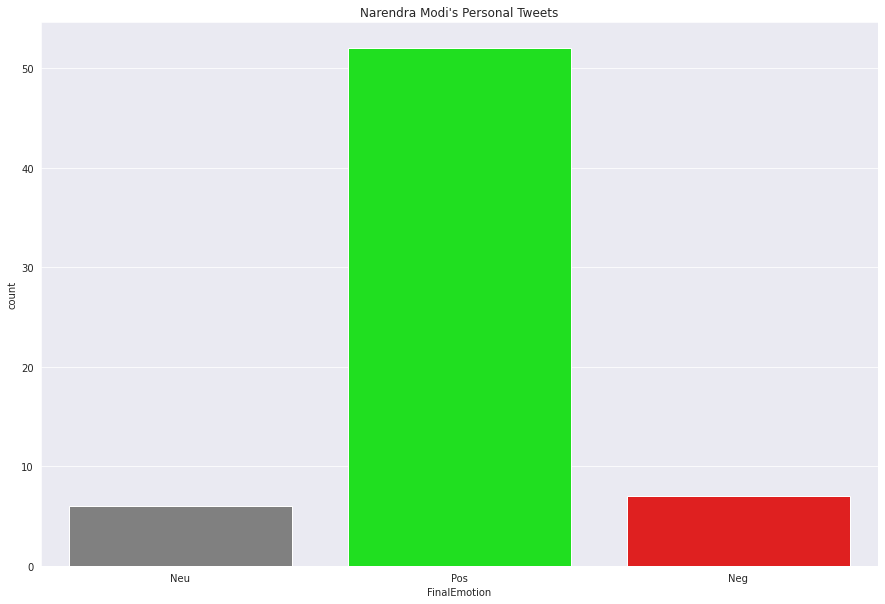

In [11]:
# Plot counting total number of positive, negative and neutral emotions
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df_Modi['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Narendra Modi\'s Personal Tweets')
plt.show()

<a id="h3.2"></a>

## <p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">3.2 Using Vader Sentiment</p>

In [12]:
df_Modi.drop('FinalEmotion',axis=1, inplace=True)

#  By Using Vader sentiment Analyzer

analyser = SentimentIntensityAnalyzer() # For polarity calculation

# positive polarity score calculator
def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

# negative polarity score calculator
def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

# ne polarity score calculator
def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

# Applying on tweets
df_Modi['pos'] = df_Modi['Tweet'].apply(lambda x :pos(x))
df_Modi['neg'] = df_Modi['Tweet'].apply(lambda x :neg(x))
df_Modi['neu'] = df_Modi['Tweet'].apply(lambda x :neu(x))

# Final Emotions
ggez=[]
for i in range(0,65):
    ggez.append(max(df_Modi['pos'][i],df_Modi['neu'][i],df_Modi['neg'][i]))

df_Modi['FinalEmotion']=ggez
for i in range(0,65):
    if df_Modi['FinalEmotion'][i]==df_Modi['pos'][i]:
        df_Modi['FinalEmotion'][i]='positive'
    elif df_Modi['FinalEmotion'][i]==df_Modi['neg'][i]:
        df_Modi['FinalEmotion'][i]='negative' 
    elif df_Modi['FinalEmotion'][i]==df_Modi['neu'][i]:
        df_Modi['FinalEmotion'][i]='neutral'
df_Modi

,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-12 01:17:12+00:00,narendramodi,Yet phase 2019 Lok Sabha elections here! Urgin...,0.197,0.000,0.803,neutral
1,2019-05-09 02:00:26+00:00,narendramodi,Will addressing rallies today. Looking forward...,0.304,0.000,0.696,neutral
2,2019-05-08 13:41:51+00:00,narendramodi,Delhi given great love affection BJP. In short...,0.461,0.000,0.539,neutral
3,2019-05-06 01:18:46+00:00,narendramodi,Requesting voting today’s fifth phase 2019 Lok...,0.333,0.000,0.667,neutral
4,2019-04-29 01:18:03+00:00,narendramodi,Another phase General Elections begins today. ...,0.183,0.000,0.817,neutral
...,...,...,...,...,...,...,...
60,2019-02-09 12:23:13+00:00,narendramodi,"During Congress rule, headlines Northeast indi...",0.246,0.156,0.599,neutral
61,2019-02-08 01:57:45+00:00,narendramodi,"In afternoon, I address public meeting Mainagu...",0.178,0.000,0.822,neutral
62,2019-01-31 11:15:16+00:00,narendramodi,I thank people Jind blessing @BJP4Haryana. Thi...,0.500,0.000,0.500,positive
63,2019-01-25 06:31:18+00:00,narendramodi,I urge people walks life create awareness vote...,0.215,0.000,0.785,neutral


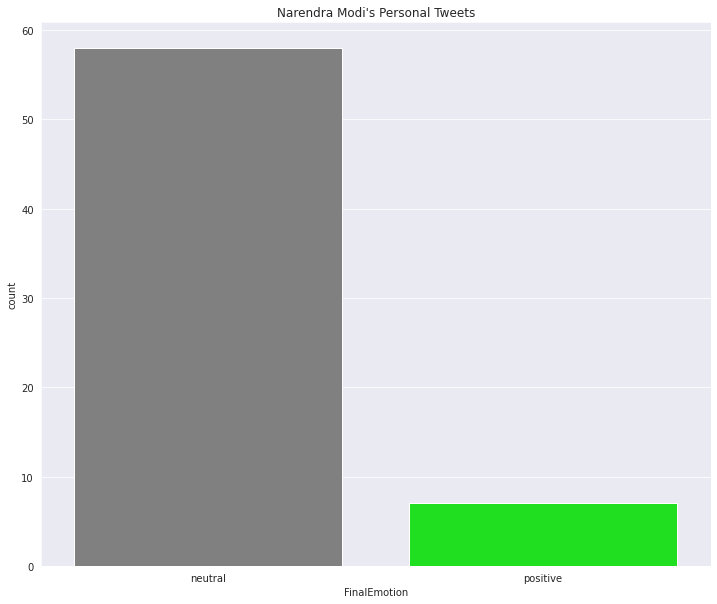

In [13]:
# Count of neutral and positive emotions count
plt.figure(figsize=(12,10))
ax = sns.countplot(x=df_Modi['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Narendra Modi\'s Personal Tweets')
plt.show()

<a id="h3.3"></a>

## <p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">3.3 Using TextBlob</p>

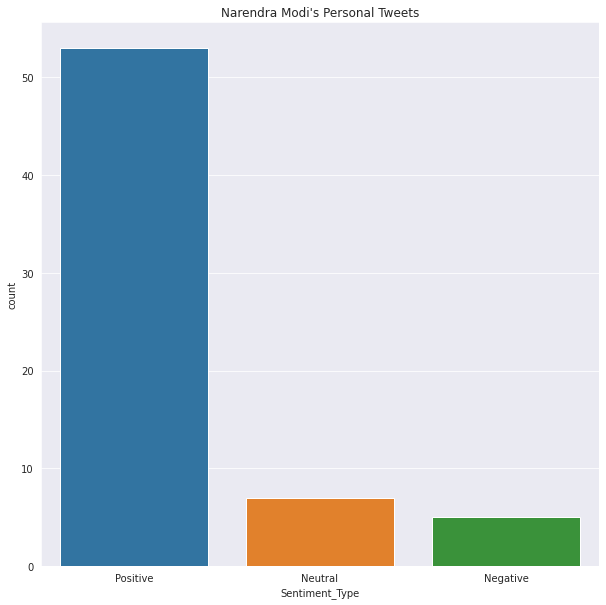

In [14]:
# By Textblob

from textblob import TextBlob

bloblist_desc = list()

twit=df_Modi['Tweet'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)
ax.set_title('Narendra Modi\'s Personal Tweets')
plt.show()

<a id="h4"></a>

# <p style="background-color:skyblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">4. Sentiment For Rahul Gandhi's Tweets</p>

<a id="h4.1"></a>

## <p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">4.1 Using Bert</p>

In [15]:
df_Rahul['FinalEmotion'] = df_Rahul['Tweet'].apply(lambda x: sentiment_score(x))
df_Rahul['FinalEmotion']=df_Rahul['FinalEmotion'].apply(lambda x : 'Pos' if x==5 else ('Neg' if x==1 else 'Neu'))
df_Rahul

,Date,User,Tweet,FinalEmotion
0,2019-05-18 06:59:40+00:00,RahulGandhi,Greetings &amp; Best Wishes auspicious occasio...,Pos
1,2019-05-17 12:39:41+00:00,RahulGandhi,Congratulations Modi Ji. Excellent Press Confe...,Pos
2,2019-05-14 10:11:18+00:00,RahulGandhi,🇮🇳 🇮🇳 🇮🇳 I'm pushing new language politics. Le...,Neg
3,2019-05-09 16:01:12+00:00,RahulGandhi,"Dear Mr Modi, Your recent statements, intervie...",Neu
4,2019-05-05 05:45:31+00:00,RahulGandhi,"Modi Ji, The battle over. Your Karma awaits yo...",Pos
...,...,...,...,...
59,2019-01-09 15:29:53+00:00,RahulGandhi,"With respect Modi Ji, culture respect women be...",Neg
60,2019-01-08 10:02:46+00:00,RahulGandhi,The truth Rafale destroy Mr Modi. It’s questio...,Neg
61,2019-01-03 06:41:57+00:00,RahulGandhi,So PM fled Parliament &amp; open book Rafale e...,Neg
62,2019-01-02 15:21:59+00:00,RahulGandhi,"Tomorrow, PM faces Open Book #RafaleDeal Exam ...",Neg


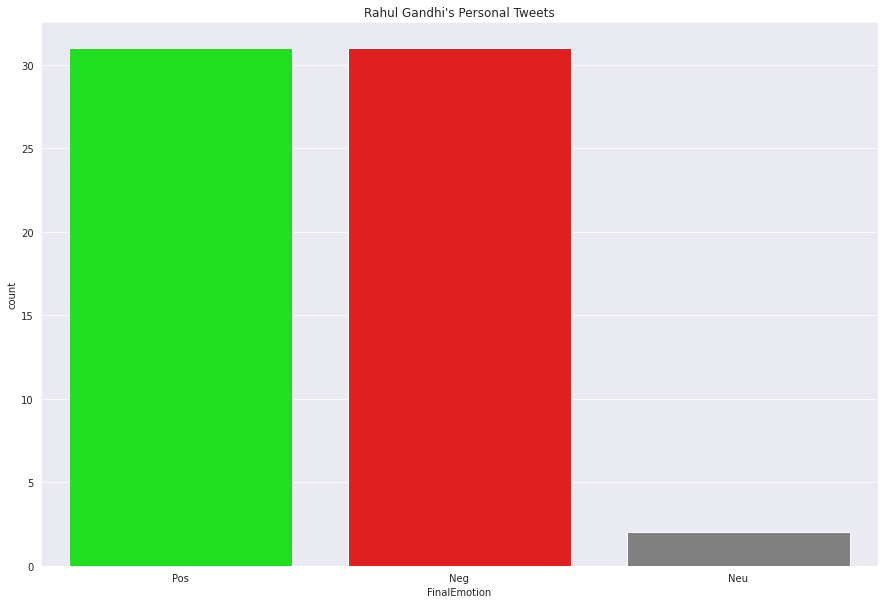

In [16]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df_Rahul['FinalEmotion'],palette=['#00FF00',"#FF0000",'#808080'])
ax.set_title('Rahul Gandhi\'s Personal Tweets')
plt.show()

<a id="h4.2"></a>

## <p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">4.2 Using Vader Sentiment</p>

In [17]:
df_Rahul['pos'] = df_Rahul['Tweet'].apply(lambda x :pos(x))
df_Rahul['neg'] = df_Rahul['Tweet'].apply(lambda x :neg(x))
df_Rahul['neu'] = df_Rahul['Tweet'].apply(lambda x :neu(x))

ggez=[]
for i in range(0,64):
    ggez.append(max(df_Rahul['pos'][i],df_Rahul['neu'][i],df_Rahul['neg'][i]))

df_Rahul['FinalEmotion']=ggez

for i in range(0,64):
    if df_Rahul['FinalEmotion'][i]==df_Rahul['pos'][i]:
        df_Rahul['FinalEmotion'][i]='positive'
    elif df_Rahul['FinalEmotion'][i]==df_Rahul['neg'][i]:
        df_Rahul['FinalEmotion'][i]='negative' 
    elif df_Rahul['FinalEmotion'][i]==df_Rahul['neu'][i]:
        df_Rahul['FinalEmotion'][i]='neutral'

In [18]:
df_Rahul['FinalEmotion'].value_counts()

neutral     50
positive    10
negative     4
Name: FinalEmotion, dtype: int64

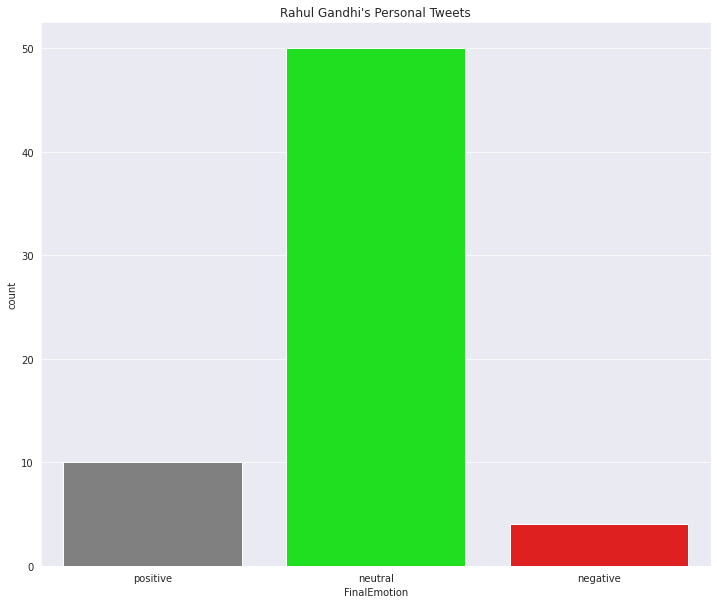

In [19]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x=df_Rahul['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Rahul Gandhi\'s Personal Tweets')
plt.show()

<a id="h4.3"></a>

## <p style="background-color:lightblue;font-family:newtimeroman;font-size:200%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">4.3 Using TextBlob</p>

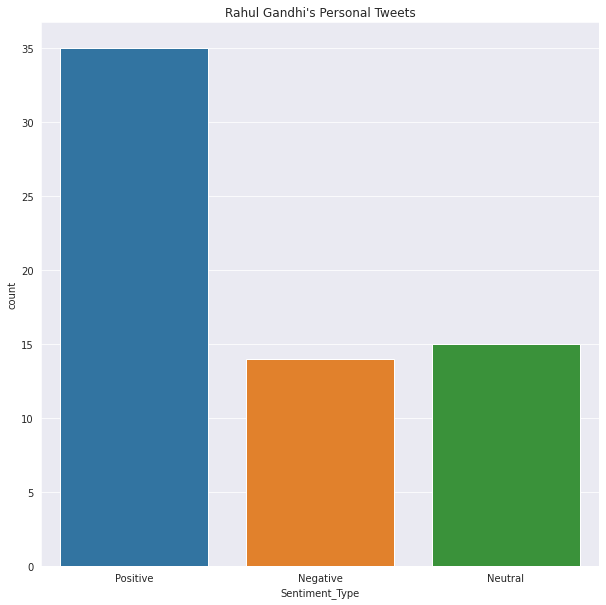

In [20]:
bloblist_desc = list()

twit=df_Rahul['Tweet'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)
ax.set_title('Rahul Gandhi\'s Personal Tweets')
plt.show()

<a id="h5"></a>

# <p style="background-color:skyblue;font-family:newtimeroman;font-size:150%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">5. Comparative Study of Tweets sentiments of tweets from <br>Narendra Modi & Rahul Gandhi</p>

In [21]:
# Combining Both The Dataframes 

dfNR=pd.concat([df_Modi,df_Rahul], axis=0)
dfNR=dfNR.reset_index(drop=True)
dfNR

,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,2019-05-12 01:17:12+00:00,narendramodi,Yet phase 2019 Lok Sabha elections here! Urgin...,0.197,0.000,0.803,neutral
1,2019-05-09 02:00:26+00:00,narendramodi,Will addressing rallies today. Looking forward...,0.304,0.000,0.696,neutral
2,2019-05-08 13:41:51+00:00,narendramodi,Delhi given great love affection BJP. In short...,0.461,0.000,0.539,neutral
3,2019-05-06 01:18:46+00:00,narendramodi,Requesting voting today’s fifth phase 2019 Lok...,0.333,0.000,0.667,neutral
4,2019-04-29 01:18:03+00:00,narendramodi,Another phase General Elections begins today. ...,0.183,0.000,0.817,neutral
...,...,...,...,...,...,...,...
124,2019-01-09 15:29:53+00:00,RahulGandhi,"With respect Modi Ji, culture respect women be...",0.337,0.100,0.564,neutral
125,2019-01-08 10:02:46+00:00,RahulGandhi,The truth Rafale destroy Mr Modi. It’s questio...,0.232,0.131,0.637,neutral
126,2019-01-03 06:41:57+00:00,RahulGandhi,So PM fled Parliament &amp; open book Rafale e...,0.188,0.000,0.812,neutral
127,2019-01-02 15:21:59+00:00,RahulGandhi,"Tomorrow, PM faces Open Book #RafaleDeal Exam ...",0.000,0.000,1.000,neutral


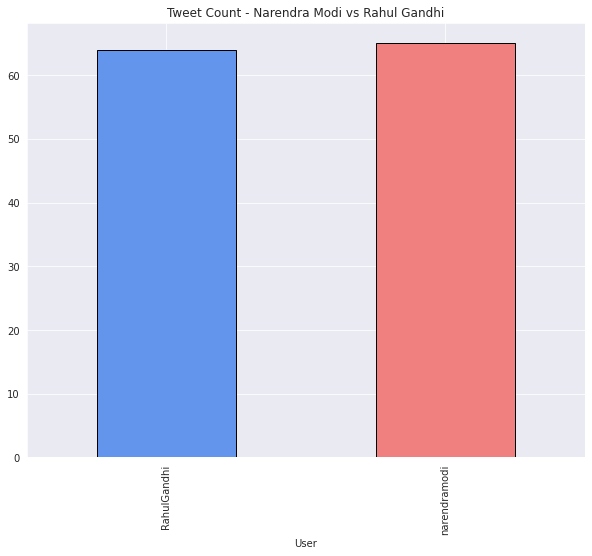

In [22]:
plt.figure(figsize=(10,8))
dfNR.groupby(['User']).count().Tweet.plot(kind='bar',title='Tweet Count - Narendra Modi vs Rahul Gandhi',edgecolor='black',color=['cornflowerblue','lightcoral'])
plt.show()

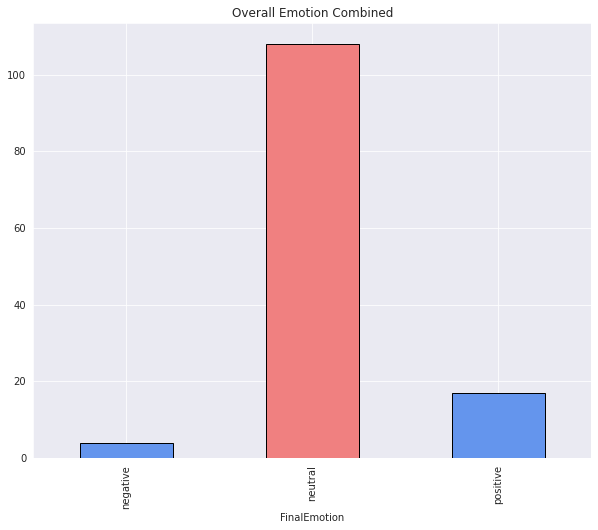

In [23]:
plt.figure(figsize=(10,8))
dfNR.groupby(['FinalEmotion']).count().Tweet.plot(kind='bar',title='Overall Emotion Combined',edgecolor='black',color=['cornflowerblue','lightcoral'])
plt.show()

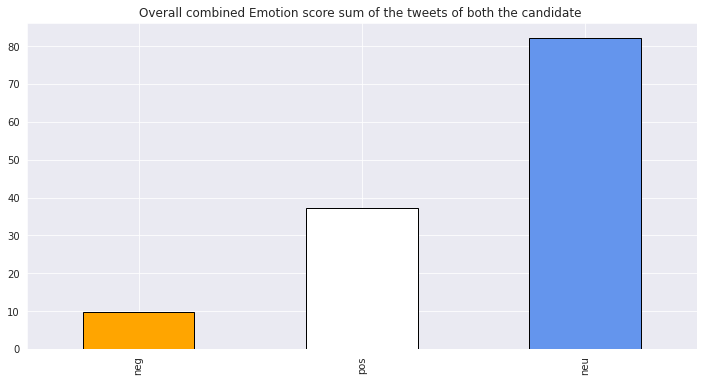

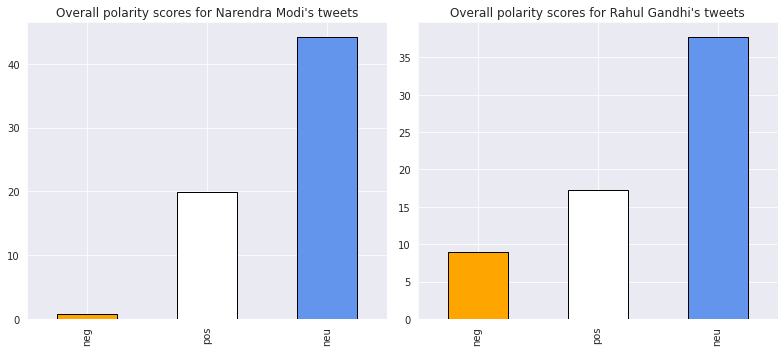

In [24]:
plt.figure(figsize=(12,6))

dfNR[['neg','pos','neu']].sum().plot(kind='bar',title='Overall combined Emotion score sum of the tweets of both the candidate ',edgecolor='black',color=['orange','white','cornflowerblue'])
plt.show()

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
df_Modi[['neg','pos','neu']].sum().plot(kind='bar',title="Overall polarity scores for Narendra Modi's tweets",edgecolor='black',color=['orange','white','cornflowerblue'])

plt.subplot(1,2,2)
df_Rahul[['neg','pos','neu']].sum().plot(kind='bar',title="Overall polarity scores for Rahul Gandhi's tweets",edgecolor='black',color=['orange','white','cornflowerblue'])

plt.tight_layout()
plt.show()

<a id="h6"></a>

# <p style="background-color:skyblue;font-family:newtimeroman;font-size:180%;text-align:center;border-style: solid;border-color: black;border-radius: 15px 15px;">6. Results and Conclusion</p>

So conclusion from above visualizations:

1. Both candidate have RELATIVELY same no. of tweets so we can assume somewhat same engagement from both sides.
2. Though if we see the negative polarity score is more for Rahul Gandhi's tweets than Narendra Modi's tweets, It may be beneficial for both the sides as Rahul Gandhi is the leader of opposition and Modi was present PM at that time, But POSITIVE APPROACH OF MODI'S TWEETS MAY BE SLIGHTLY MORE THAN GANDHI'S NEGATIVE TWEETS.

[⩞ Top ⩞](#top)
___

<span style="font-family:Comic Sans MS; color:navy"><strong>Waiting for your valuable feedback</strong></span>
<blockquote><h2><span style="color:navy">T</span><span style="color:blue">h</span><span style="color:green">a</span><span style="color:red">n</span><span style="color:red">k</span> <span style="color:green">y</span><span style="color:blue">o</span><span style="color:navy">u</span> 🙂</h2></blockquote>